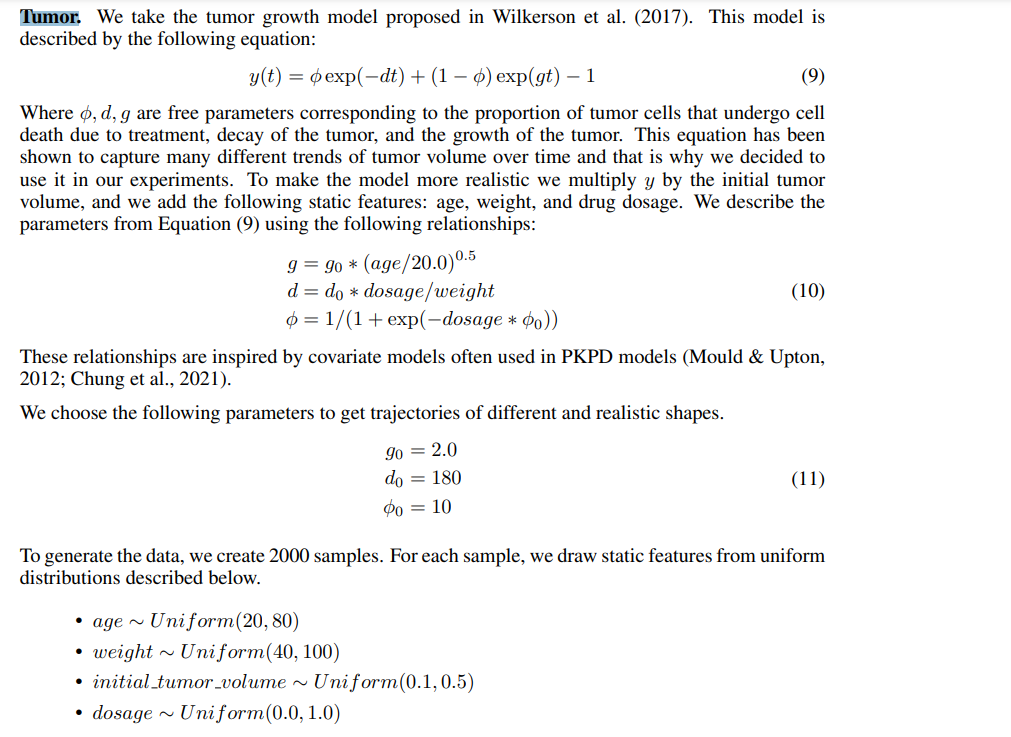

# Generate data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

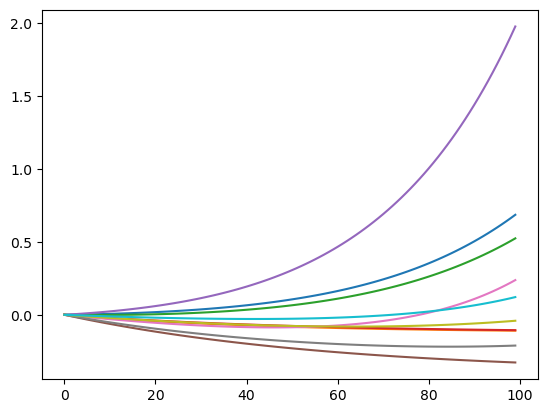

In [230]:
N   = 3000
age = np.random.uniform(20,80, size = N)
weight                = np.random.uniform(40,100, size=  N)
initial_tumor_volume = np.random.uniform(0.1,0.5, size = N)
dosage                = np.random.uniform(size = N)

g_0   = 2.0
d_0   = 180
phi_0 = 10.

g     = g_0 * (age / 20.0) ** (0.5)
d     = d_0 * dosage/weight
phi   = 1./(1 + np.exp(- dosage * phi_0))

t     = np.linspace(0,1,100)
Y     = np.array([
        (phi_i * np.exp( - d_i * t  ) + (1 - phi_i) * np.exp(g_i * t) - 1) * itv_i
    for g_i,d_i,phi_i,itv_i in zip(g,d,phi,initial_tumor_volume)
])
plt.plot(Y[:10].T)
plt.show()

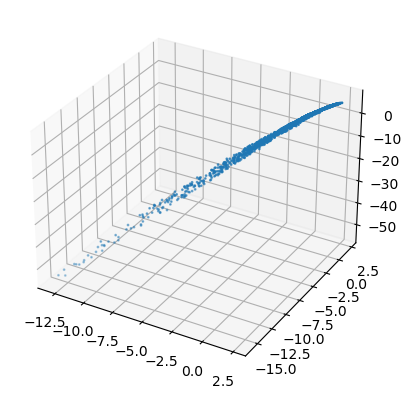

In [231]:
random_proj = Y @ np.random.randn(100,3)
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter(random_proj[:,0],random_proj[:,1],random_proj[:,2], s = 1.)

In [232]:
from sklearn.decomposition import PCA, KernelPCA

kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=2, fit_inverse_transform=True, alpha=0.1
)

Y_transform = kernel_pca.fit(Y).transform(Y)

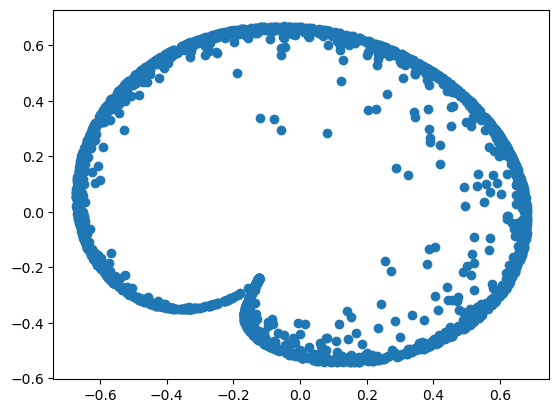

In [233]:
plt.scatter(Y_transform[:,0] , Y_transform[:,1] )

In [234]:
Y_transform

array([[-1.52389104e-01, -3.09854357e-01, -3.18412251e-01, ...,
         4.24362497e-07,  9.21549145e-07,  1.78112532e-06],
       [ 6.77912610e-01, -5.14618331e-02,  2.72834158e-01, ...,
         2.94750180e-08,  2.14078227e-07,  1.25121005e-07],
       [-1.63913753e-01, -3.45406746e-01, -4.17634047e-01, ...,
        -5.98639417e-07, -1.92785819e-07,  3.78270215e-07],
       ...,
       [-1.36287950e-01, -2.69646261e-01, -2.19121184e-01, ...,
        -9.77605623e-08,  4.73829687e-09, -1.94180529e-08],
       [ 5.05298305e-01, -3.92438349e-01,  2.53447134e-01, ...,
         1.28219824e-07,  4.79927621e-07, -2.25956683e-07],
       [ 6.05482383e-01,  2.35534160e-01,  9.86696158e-02, ...,
        -1.61926664e-07, -8.75442652e-08,  3.95891220e-07]])

# Nadaraya Embedding

In [235]:
def k(x,y):
    return jnp.exp ( - (1e2) * (x - y) @ (x - y) )
    
def predict(x,X,Y):
    # pesi del kernel
    K = jax.vmap(lambda x_i: k(x,x_i)   * ( (x - x_i) @  (x - x_i) > 0 )  )(X)
    print(K.shape)
    # costruzione basata sul kernel
    C = K[:,None] * Y
    # media pesata
    x_hat = C.sum(axis = 0) / K.sum()
    return x_hat

batch_predict = lambda X_in,X,Y : jax.vmap(lambda x: predict(x,X,Y))(X_in) 


@jax.jit
def loss(E,X):
    return ((  batch_predict(E,E,X) -  X )**2).sum()

grad = jax.grad(loss)

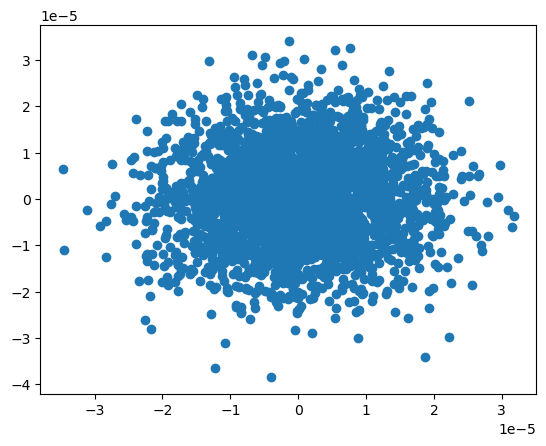

(3000,)
67085.305


  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

(3000,)


2.525: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [09:48<00:00, 16.98it/s]


In [236]:
from tqdm import tqdm

#E  = np.random.uniform(size = (len(X),2)) * 1e-2
E =  np.random.randn(len(Y), 6) *  1e-5
plt.scatter(E[:,0] , E[:,1])
plt.show()

print(loss(E,Y))
steps = 10000
bar = tqdm(range(steps))
lr  = 1e-4

T   = np.geomspace(1e-3, 1e-12,steps)
mom = E * 0
for i in bar:
    mom = mom * .92 - lr * grad(E,Y)
    E =  E + mom + T[i] * np.random.normal(size = E.shape)
    bar.set_description("%.3f" % loss(E,Y))

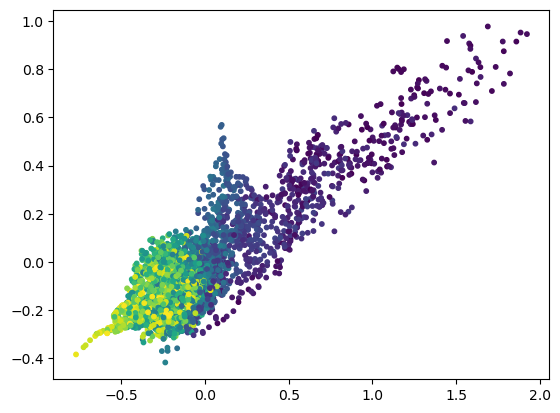

In [237]:
plt.scatter(E[:,0] , E[:,1], c = dosage, s = 10.)

2703 3000
[27.408329   6.3145895  6.028907   5.1550584  4.1289077  4.0052824]
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)


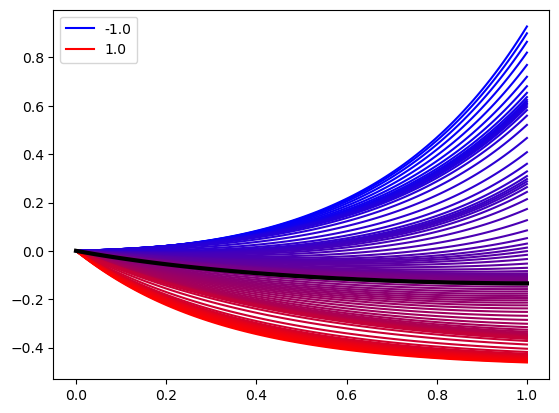

In [238]:
E_mu = E.mean(axis = 0)
E_zc = E.copy() - E_mu

E_query = E[10]
E_zc = E_zc[np.arange(len(E_zc))[jnp.linalg.norm(E_zc - E_query, axis = 1) < 1.5]]
print(len(E_zc),len(E))

U,s,Vt = np.linalg.svd(E_zc, full_matrices = False)
print(s)
direzione = Vt.T[:,0]
for a in np.linspace(-1,1,100):
    c = (a + 1)/2.
    if  a == -1 or a == 1:
        plt.plot( np.linspace(0,1, 100), predict(E_query + a * direzione, E, Y), color = [c,0.,1 - c] , label = a)
    else:
        plt.plot( np.linspace(0,1, 100), predict(E_query + a * direzione, E, Y), color = [c,0.,1 - c])
plt.plot(  np.linspace(0,1, 100), predict(E_query, E, Y), lw = 3, color = 'black' )

plt.legend()

<BarContainer object of 6 artists>

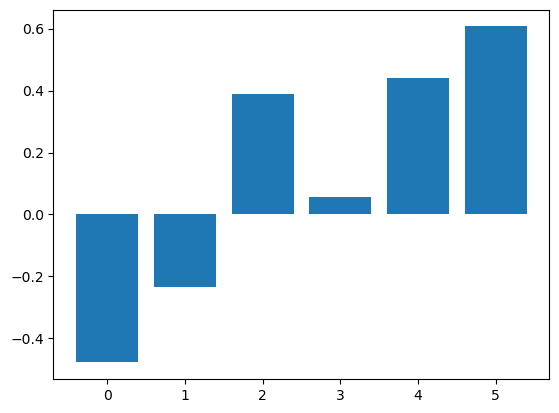

In [239]:
plt.bar(np.arange(len(Vt.T)),Vt[0])

In [541]:
X = np.c_[age, weight, dosage, initial_tumor_volume]


X_train = X[:500]
X_test  = X[len(X_train):]
E_train = E[:len(X_train)]
E_test  = E[len(X_train):]
Y_train = Y[:len(X_train)]
Y_test  = Y[len(X_train):]

In [542]:
relu     = lambda x: jnp.maximum(0,x)
softmax  = lambda x : jnp.exp(x)/jnp.exp(x).sum()
sigmoide = lambda x: (jnp.tanh(x) + 1.)/2.
def ANN(params, x, W_lin):

    weights = params[0::2]
    biases  = params[1::2]
    
    layer = x.copy()

    for W,b in zip(weights[:-1],biases[:-1]):
        layer = relu(W@layer + b)
        
    W,b = weights[-1],biases[-1]
    layer = W@layer + b
    
    # ritorno la componente lineare  imparata con la pseudoinversa
    return layer +  x @ W_lin
    
batch_ANN = lambda W,X : jax.vmap(lambda x: ANN(W,x))(X)

def init_params(topology):
    params = []
    for t,t_next in zip(topology[:-1],topology[1:]):
        params.append(
            np.random.randn(t_next, t) * 1. / np.sqrt(t_next * t)
        )
        params.append(
            np.zeros(t_next)
        )
    return params

params = init_params([4,500,500,6])

In [553]:
@jax.jit
def  loss(params,x,W,e):
    r = ANN(params,x,W) - e
    return r@r
batch_loss = jax.jit(lambda params,X,W,E: jax.vmap(lambda x,e: loss(params,x,W,e))(X,E).mean())
batch_grad = jax.jit(jax.grad(batch_loss))

In [557]:
W = np.linalg.pinv(X_train) @ E_train
loss(params, X[30], W,E[30])

DeviceArray(0.47763753, dtype=float32)

In [570]:
params = init_params([4,2_000,2_000,E.shape[1]])

subdivide = lambda v,size : np.array_split(v, int(len(v)/size) )
lr        = 1e-1

for i in range(10_000):
    indici = np.random.choice(len(X_train),len(X_train),False)
    batches = subdivide(indici,128)
    for b in batches[:-1]:
        gradient = batch_grad(params,X_train[b],W,E_train[b])
        for j in range(len(params)):
            #print(np.linalg.norm(mom[j]))
            params[j] -= lr * gradient[j]
    print("epoch [%d], loss = %.3f,  val loss = %.3f" % (i, batch_loss(params,X_train,W,E_train), batch_loss(params,X_test,W,E_test) ))

epoch [0], loss = 0.362,  val loss = 0.380
epoch [1], loss = 0.284,  val loss = 0.305
epoch [2], loss = 0.283,  val loss = 0.305
epoch [3], loss = 0.283,  val loss = 0.305
epoch [4], loss = 0.283,  val loss = 0.305
epoch [5], loss = 0.283,  val loss = 0.305
epoch [6], loss = 0.283,  val loss = 0.305
epoch [7], loss = 0.283,  val loss = 0.304
epoch [8], loss = 0.283,  val loss = 0.304
epoch [9], loss = 0.283,  val loss = 0.304
epoch [10], loss = 0.283,  val loss = 0.305
epoch [11], loss = 0.283,  val loss = 0.305
epoch [12], loss = 0.283,  val loss = 0.304
epoch [13], loss = 0.283,  val loss = 0.304
epoch [14], loss = 0.283,  val loss = 0.304
epoch [15], loss = 0.283,  val loss = 0.304
epoch [16], loss = 0.283,  val loss = 0.304
epoch [17], loss = 0.283,  val loss = 0.304
epoch [18], loss = 0.283,  val loss = 0.304
epoch [19], loss = 0.283,  val loss = 0.304
epoch [20], loss = 0.283,  val loss = 0.304
epoch [21], loss = 0.283,  val loss = 0.304
epoch [22], loss = 0.283,  val loss = 0.30

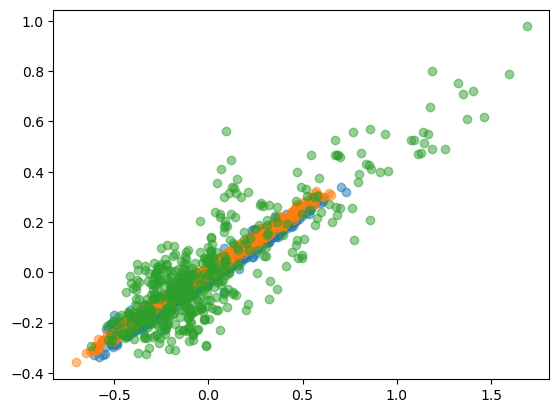

In [571]:
E_hat = jax.vmap(lambda x:ANN(params,x,W))(X_train)
E_hat_base = X_train@W
plt.scatter(E_hat[:,0],E_hat[:,1], alpha = 0.5)
plt.scatter(E_hat_base[:,0],E_hat_base[:,1], alpha = 0.5)
plt.scatter(E_train[:,0], E_train[:,1], alpha = 0.5)

(500,)


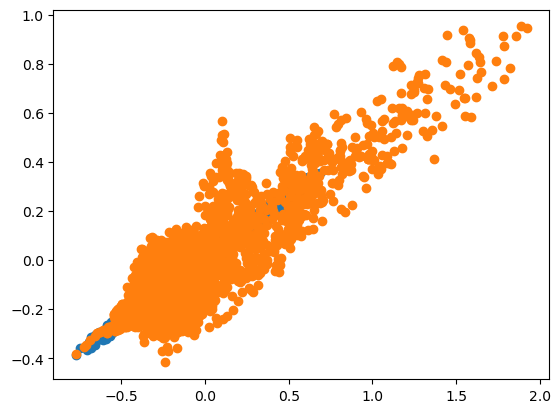

In [1025]:
E_hat = X_test @ np.linalg.pinv(X_train) @ E_train
Y_hat = jax.vmap(lambda e: predict(e,E_train,Y_train))(E_hat)

plt.scatter(E_hat[:,0],E_hat[:,1])
plt.scatter(E_test[:,0], E_test[:,1])

# Homotopy Learning (Diffusion)


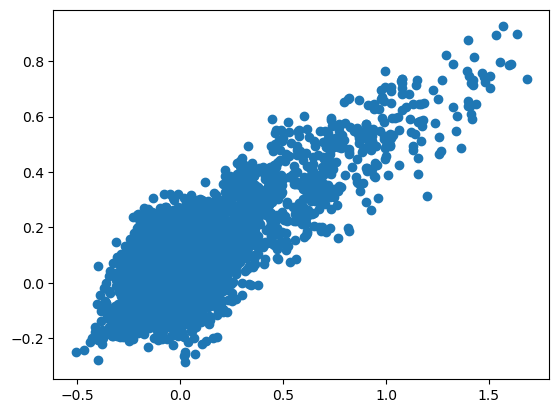

In [897]:


E_0_base = np.c_[ (X  - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0)) , np.zeros((len(X),2)) ]
E_0 = E_0.copy()
E_f = E.copy()

a = 0.99


E_factory = lambda a,E_0,E_f: (1 - a) *E_0 + a * E_f


E_a = E_factory(0.5, E_0,E_f)


plt.scatter(E_a[:,0], E_a[:,1])

In [898]:
E_0.shape

(3000, 6)

epoch = 0
1.1588963
6.438313e-05


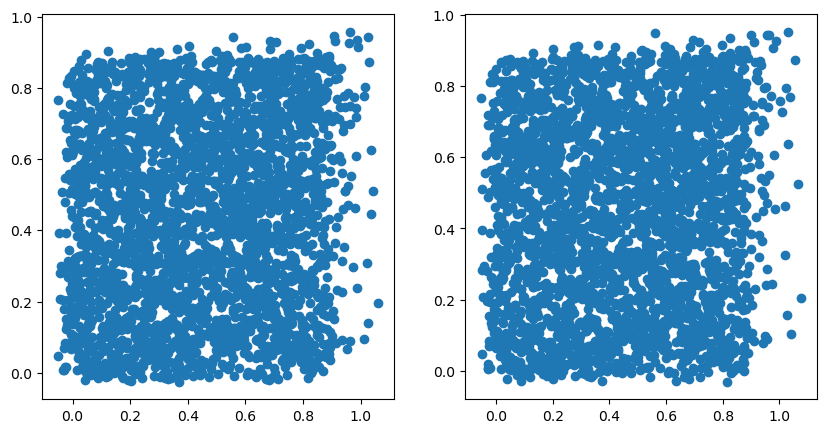

epoch = 1
4.2164707
0.00023424838


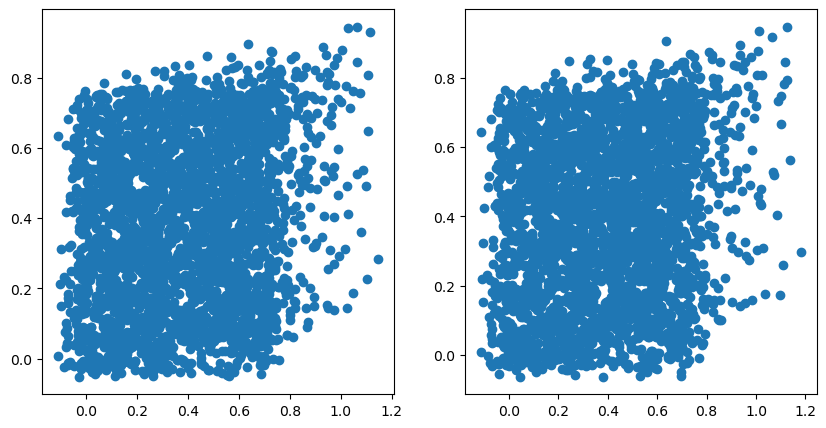

epoch = 2
8.815237
0.0004897354


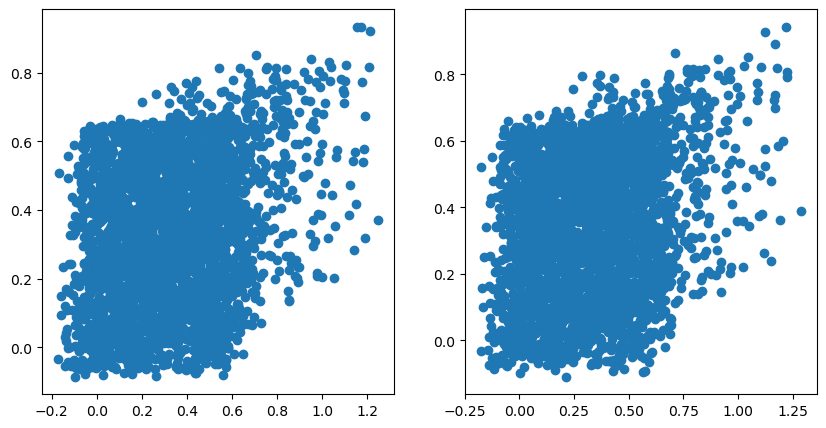

epoch = 3
14.563527
0.0008090849


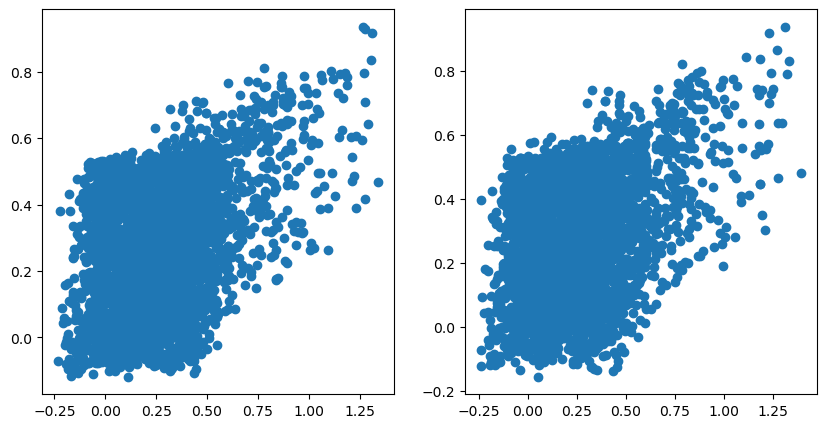

epoch = 4
20.941263
0.0011634035


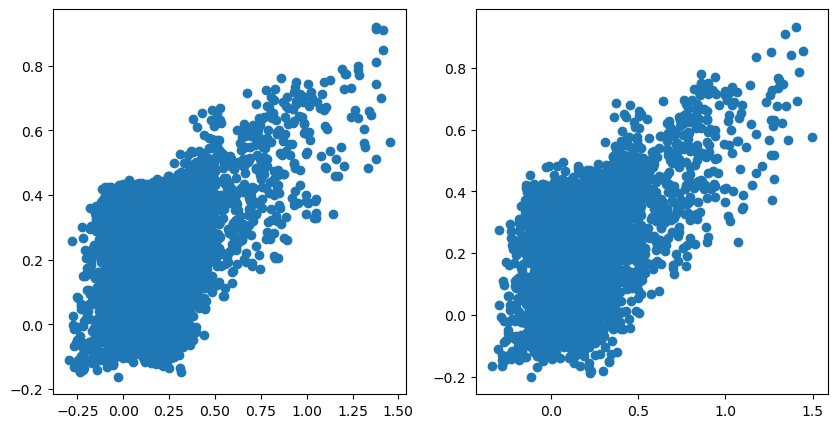

epoch = 5
38.113827
0.0021174347


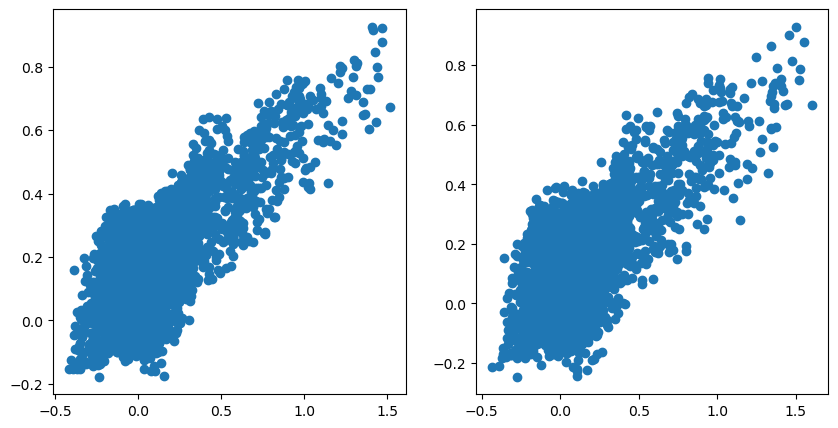

epoch = 6
37.162743
0.0020645969


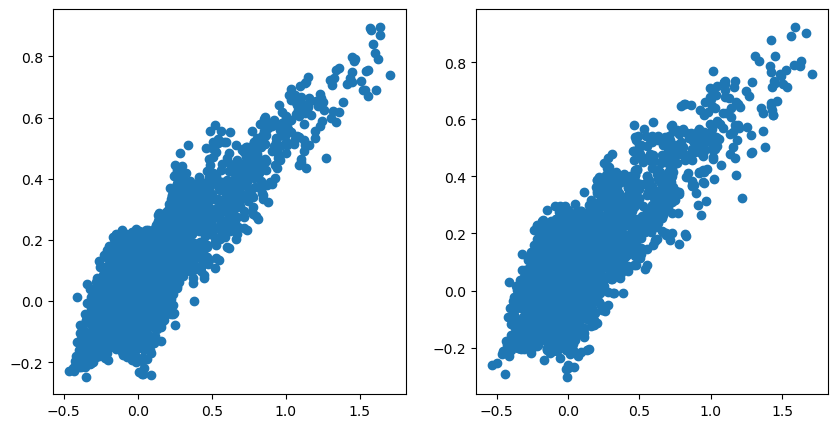

epoch = 7
48.67122
0.0027039566


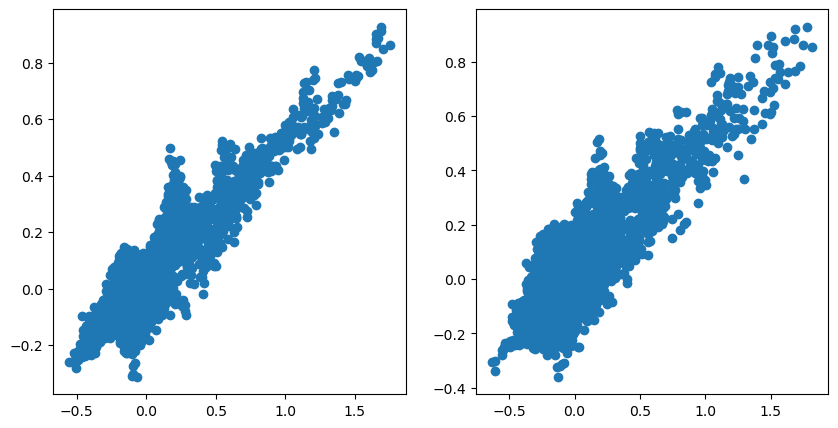

epoch = 8
62.91046
0.0034950257


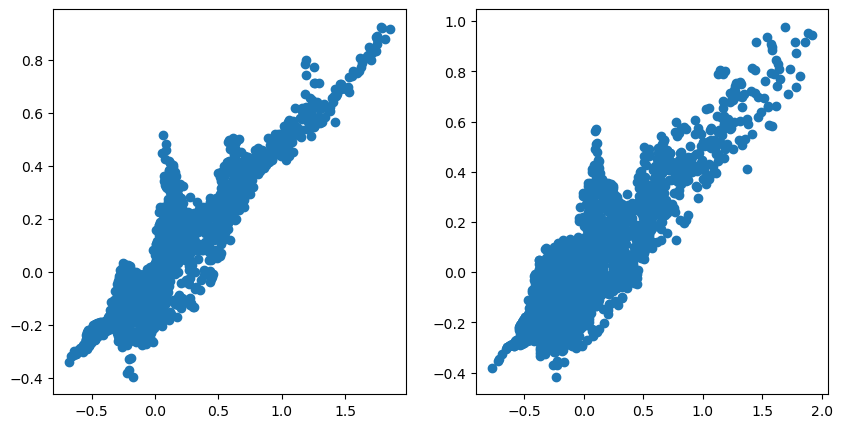

In [1018]:
P = []
W = []

def train(X,Y):
    params = init_params([X.shape[1],100,100, Y.shape[1]])
    W      = np.linalg.pinv(X)@Y

    
    @jax.jit
    def batch_loss(params,X,W,Y):
        Y_hat = jax.vmap(lambda x: ANN(params,x,W))(X)
        return ((Y_hat   - Y)**2).sum()
        
    grad = jax.jit(jax.grad(batch_loss))
    mom  = [0 * p for p in params]
    lr   = 2e-4
    for i in range(5000):
        gradiente = grad(params,X,W,Y)
        for j in range(len(params)):
            mom[j]     = mom[j] * .9 - lr * gradiente[j]
            params[j] += mom[j] 
            
    print(batch_loss(params,X,W,Y))
    return params, W


base = 0.0
E_0 =  E_factory(base, E_0_base, E_f)
buffer = E_0.copy()

a_space = np.linspace(base,1,10)
for count, a_prev, a_next in zip(range(len(a_space)-1),a_space[:-1],a_space[1:]):
    print("epoch = %d" % count)

    
    E_dest = E_factory(a_next, E_0_base, E_f)
    params,W_lin   = train(buffer,E_dest)
    P.append(params)
    W.append(W_lin)

    # visualizzo l'update
    buffer = jax.vmap(lambda x: ANN(params,x,W_lin))(buffer)
    axs = plt.figure(figsize = (10,5)).subplots(nrows = 1, ncols = 2).flatten()
    axs[0].scatter(buffer[:,0],buffer[:,1])
    axs[1].scatter(E_dest[:,0],E_dest[:,1])
    print( ((buffer - E_dest)**2).mean() )
    plt.show()

In [1019]:
E_0.shape

(3000, 6)

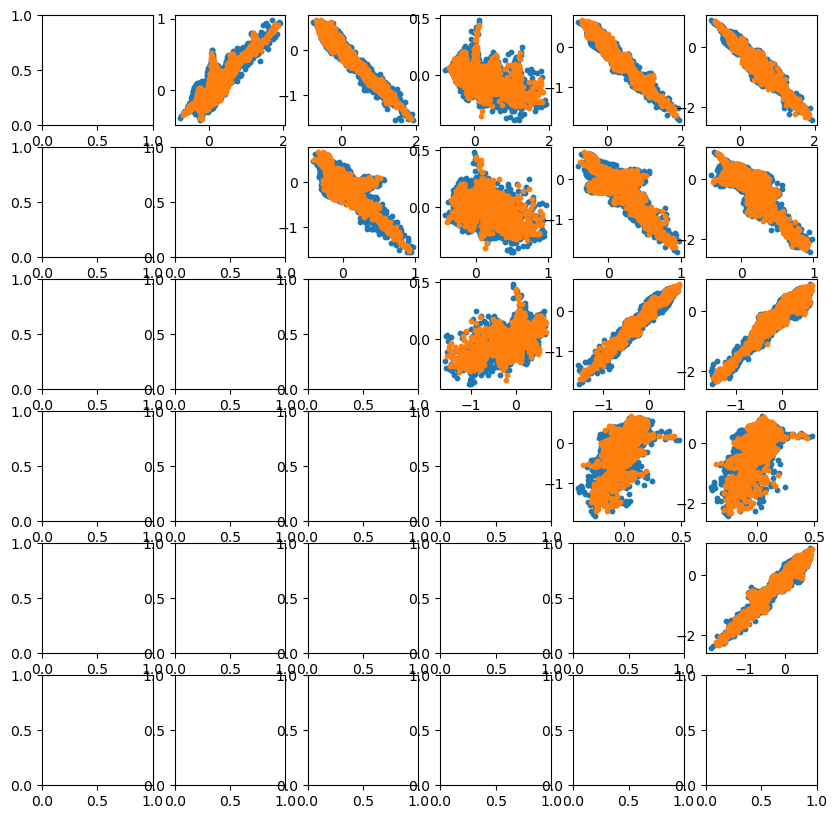

In [1038]:
buffer = E_0.copy()
for params,w in zip(P,W):
    buffer = jax.vmap(lambda x: ANN(params,x,w))(buffer)

axs = plt.figure(figsize = (10,10)).subplots(nrows = E_0.shape[1], ncols = E_0.shape[1])

for i in range(E.shape[1]):
    for j in range(i + 1, E.shape[1]):
        axs[i,j].scatter(E[:,i],E[:,j], s = 10.)
        axs[i,j].scatter(buffer[:,i],buffer[:,j],  s = 10.)


(3000,)


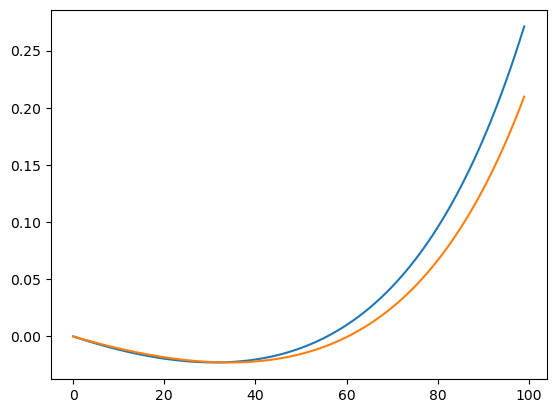

In [1039]:
sample = 153
buffer = E_0[sample]
for params,w in zip(P,W):
    buffer = ANN(params,buffer,w)

plt.plot( predict(buffer, E, Y) )
plt.plot( Y[sample] )

In [1040]:
def  build_dataset(N):
    age = np.random.uniform(20,80, size = N)
    weight                = np.random.uniform(40,100, size=  N)
    initial_tumor_volume = np.random.uniform(0.1,0.5, size = N)
    dosage                = np.random.uniform(size = N)
    
    g_0   = 2.0
    d_0   = 180
    phi_0 = 10.
    
    g     = g_0 * (age / 20.0) ** (0.5)
    d     = d_0 * dosage/weight
    phi   = 1./(1 + np.exp(- dosage * phi_0))
    
    t     = np.linspace(0,1,100)
    Y     = np.array([
            (phi_i * np.exp( - d_i * t  ) + (1 - phi_i) * np.exp(g_i * t) - 1) * itv_i
        for g_i,d_i,phi_i,itv_i in zip(g,d,phi,initial_tumor_volume)
    ])
    X = np.c_[age, weight, dosage, initial_tumor_volume]
    E_0 = np.c_[ (X  - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0)) , np.zeros((len(X),2)) ]
    return X,Y,E_0

X_val,Y_val,E_0_val = build_dataset(1000)

[-0.1010312  -0.04429743  0.0653961   0.02912519  0.10861198  0.13636978]
(3000,)
(3000,)
[-0.14783248 -0.12274285  0.29598293 -0.1050657   0.23768182  0.18213679]
(3000,)
(3000,)
[-0.23127833 -0.00608571  0.07409462  0.06056853  0.15582082  0.4022145 ]
(3000,)
(3000,)
[-0.16983548 -0.14732258  0.23749831  0.00447449  0.17965518  0.16289791]
(3000,)
(3000,)
[-0.10912728 -0.1898994   0.09156189 -0.0992263  -0.11422283 -0.08697244]
(3000,)
(3000,)
[ 0.03807288 -0.02106897 -0.04804618  0.04450782 -0.03660751 -0.13254043]
(3000,)
(3000,)
[-0.160756   -0.09909788  0.11683647  0.02863381  0.14366063  0.21645333]
(3000,)
(3000,)
[-0.01462378 -0.01455784  0.07098493  0.03066551  0.02798103  0.09373845]
(3000,)
(3000,)
[-0.32942095 -0.1765303   0.274167    0.02936554  0.2791522   0.37829176]
(3000,)
(3000,)
[ 0.2726344   0.02675289 -0.20941187 -0.03116688 -0.29159227 -0.28847712]
(3000,)
(3000,)


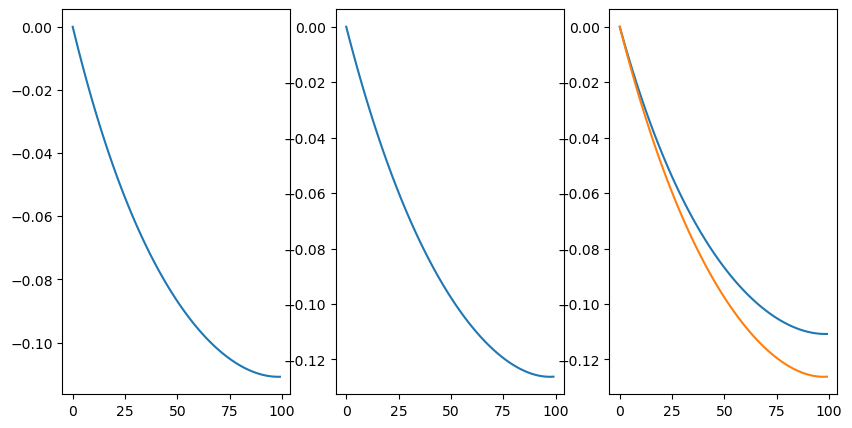

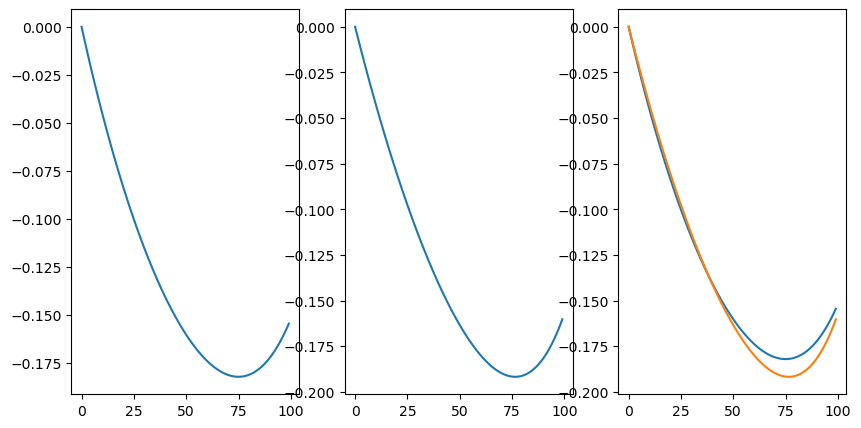

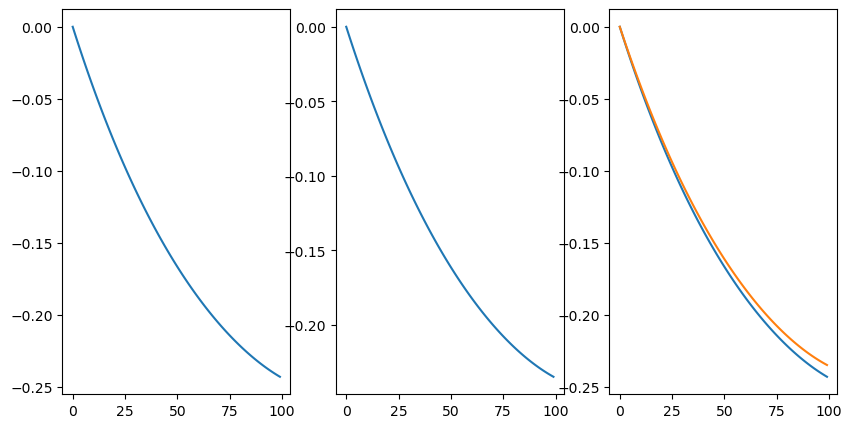

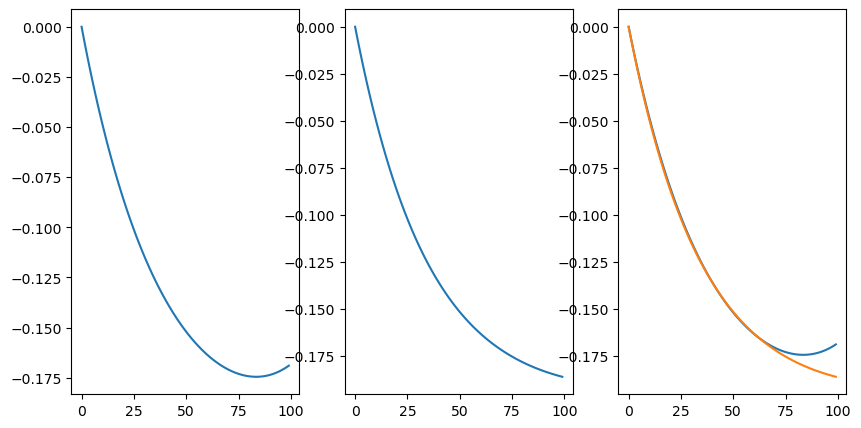

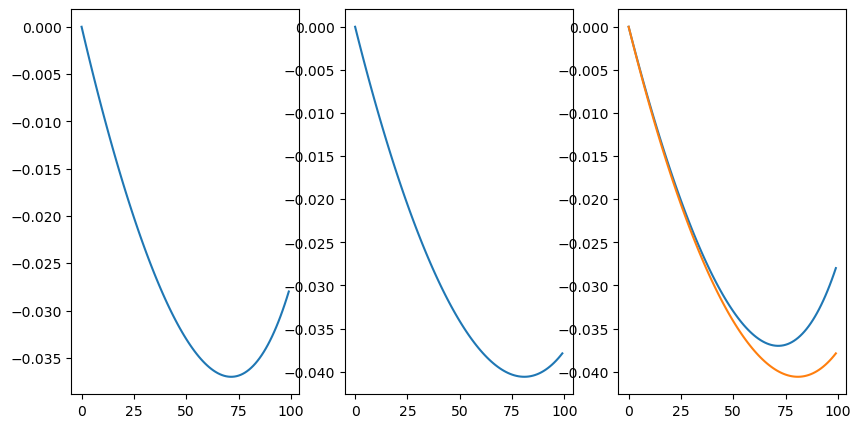

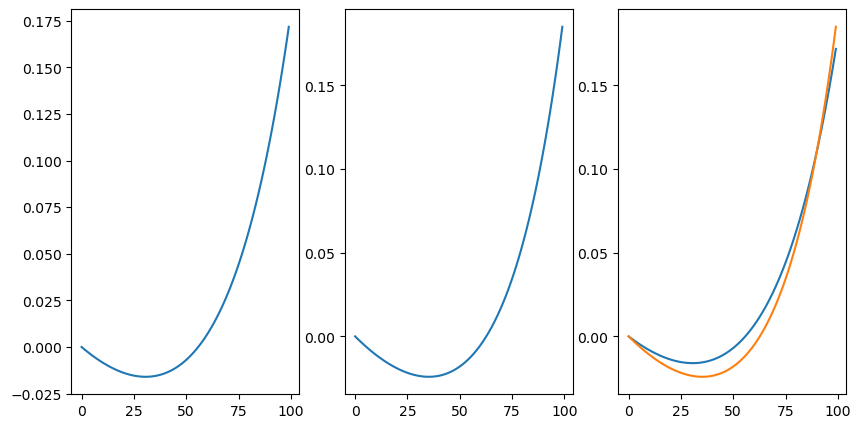

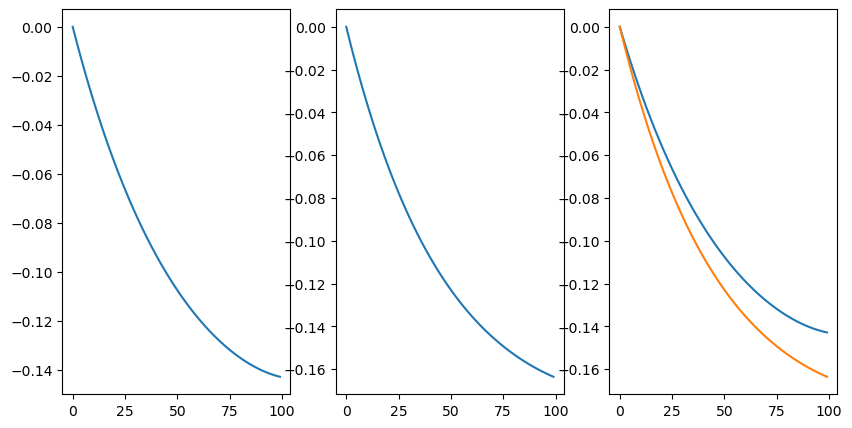

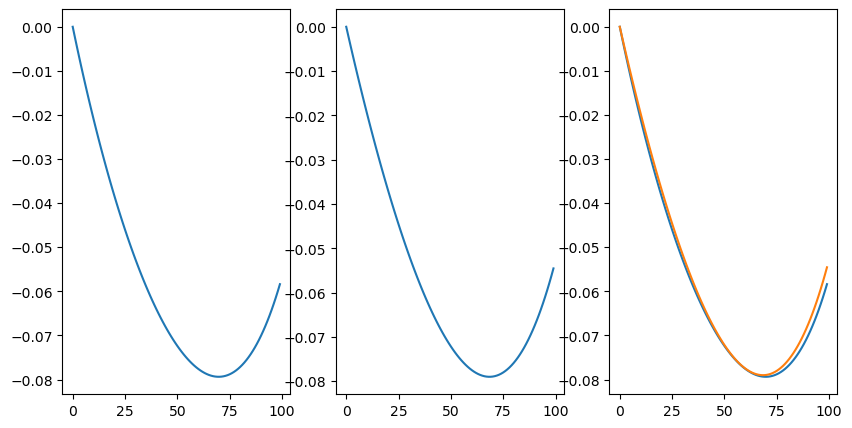

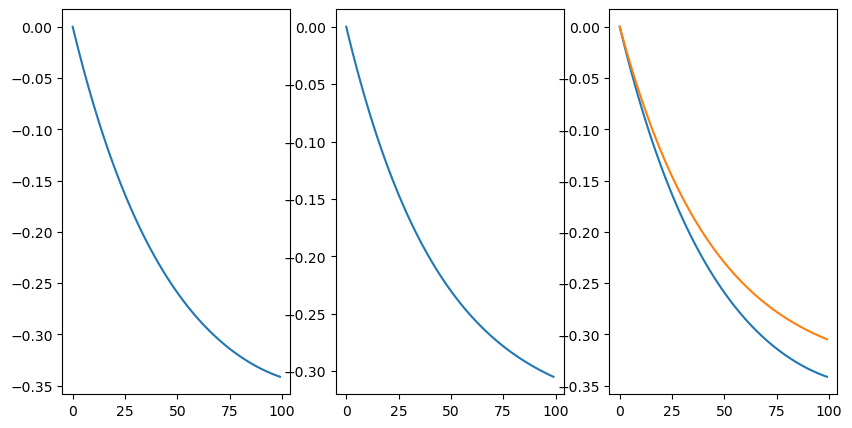

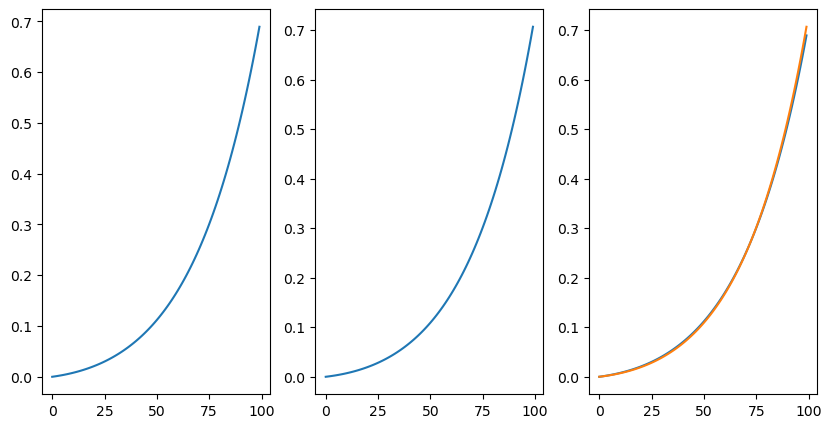

In [1041]:

for sample in range(10):
    buffer = E_0_val[sample].copy()
    for params,w in zip(P,W):
        buffer = ANN(params,buffer,w)
    
    print(buffer)
    
    axs  = plt.figure(figsize=(10,5)).subplots(nrows = 1, ncols = 3).flatten()
    axs[0].plot( predict(buffer, E, Y) )
    axs[1].plot( Y_val[sample] )
    axs[2].plot( predict(buffer, E, Y) )
    axs[2].plot( Y_val[sample] )